In [19]:
import pandas as  pd
import numpy as np

dataset = pd.read_csv("../Datasets/4.csv")
dataset.head()

,Operating Temperature (°C),Operating Pressure (Pa),Vibration Level (m/s²),Power Consumption (kW),Speed (RPM),Noise Level (dB),Maintenance Status,Time Since Last Maintenance (hours),Deviation from Expected Parameters,Historical Failure Data,Failure Code
0,41.952540,3371.521083,4.076441,4.725662,2170.568199,52.006813,0,117.700719,0.050169,1,none
1,48.607575,1040.254783,2.432812,6.666565,3266.073097,47.857451,1,856.117341,-4.500995,1,motor failure
2,44.110535,2903.304783,2.663464,8.007258,1549.657706,34.115975,0,111.045564,-3.514422,1,blade damage
3,41.795327,3835.081564,1.327551,8.664020,2398.848739,51.151652,1,645.859281,1.725528,0,none
4,36.946192,1175.901728,3.064711,8.347714,1212.865517,43.931763,1,245.217563,-0.232356,0,none


In [20]:
dataset.isnull().sum()

Operating Temperature (°C)             0
Operating Pressure (Pa)                0
Vibration Level (m/s²)                 0
Power Consumption (kW)                 0
Speed (RPM)                            0
Noise Level (dB)                       0
Maintenance Status                     0
Time Since Last Maintenance (hours)    0
Deviation from Expected Parameters     0
Historical Failure Data                0
Failure Code                           0
dtype: int64

In [21]:
dataset.nunique()

Operating Temperature (°C)             1000
Operating Pressure (Pa)                1000
Vibration Level (m/s²)                 1000
Power Consumption (kW)                 1000
Speed (RPM)                            1000
Noise Level (dB)                       1000
Maintenance Status                        2
Time Since Last Maintenance (hours)    1000
Deviation from Expected Parameters     1000
Historical Failure Data                   2
Failure Code                              3
dtype: int64

In [22]:
target_map = {'none': 0, 'motor failure': 1, 'blade damage': 2}
dataset['Failures'] = dataset['Failure Code'].map(target_map)
dataset.head()

,Operating Temperature (°C),Operating Pressure (Pa),Vibration Level (m/s²),Power Consumption (kW),Speed (RPM),Noise Level (dB),Maintenance Status,Time Since Last Maintenance (hours),Deviation from Expected Parameters,Historical Failure Data,Failure Code,Failures
0,41.952540,3371.521083,4.076441,4.725662,2170.568199,52.006813,0,117.700719,0.050169,1,none,0
1,48.607575,1040.254783,2.432812,6.666565,3266.073097,47.857451,1,856.117341,-4.500995,1,motor failure,1
2,44.110535,2903.304783,2.663464,8.007258,1549.657706,34.115975,0,111.045564,-3.514422,1,blade damage,2
3,41.795327,3835.081564,1.327551,8.664020,2398.848739,51.151652,1,645.859281,1.725528,0,none,0
4,36.946192,1175.901728,3.064711,8.347714,1212.865517,43.931763,1,245.217563,-0.232356,0,none,0


In [23]:
dataset.drop(['Failure Code', 'Historical Failure Data', 'Maintenance Status'], axis=1, inplace=True)
dataset.head()

,Operating Temperature (°C),Operating Pressure (Pa),Vibration Level (m/s²),Power Consumption (kW),Speed (RPM),Noise Level (dB),Time Since Last Maintenance (hours),Deviation from Expected Parameters,Failures
0,41.952540,3371.521083,4.076441,4.725662,2170.568199,52.006813,117.700719,0.050169,0
1,48.607575,1040.254783,2.432812,6.666565,3266.073097,47.857451,856.117341,-4.500995,1
2,44.110535,2903.304783,2.663464,8.007258,1549.657706,34.115975,111.045564,-3.514422,2
3,41.795327,3835.081564,1.327551,8.664020,2398.848739,51.151652,645.859281,1.725528,0
4,36.946192,1175.901728,3.064711,8.347714,1212.865517,43.931763,245.217563,-0.232356,0


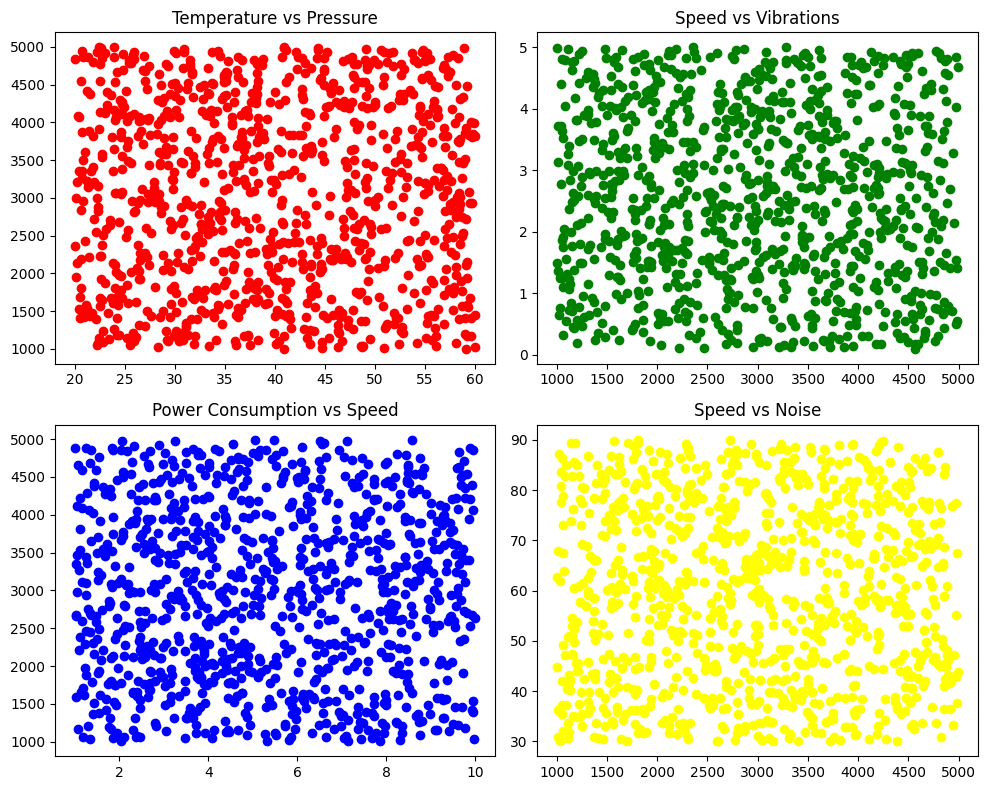

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot in each subplot
axes[0, 0].scatter(dataset['Operating Temperature (°C)'], dataset['Operating Pressure (Pa)'], color='red')
axes[0, 0].set_title('Temperature vs Pressure')

axes[0, 1].scatter(dataset['Speed (RPM)'], dataset['Vibration Level (m/s²)'], color='green')
axes[0, 1].set_title('Speed vs Vibrations')

axes[1, 0].scatter(dataset['Power Consumption (kW)'], dataset['Speed (RPM)'], color='blue')
axes[1, 0].set_title('Power Consumption vs Speed')

axes[1, 1].scatter(dataset['Speed (RPM)'], dataset['Noise Level (dB)'], color='yellow')
axes[1, 1].set_title('Speed vs Noise')

plt.tight_layout()

plt.show()

In [25]:
X = dataset.drop('Failures', axis='columns')
y = dataset['Failures']

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

accuracy = knn.score(X_test, y_test)
print(f"accuracy : {accuracy}")

predictions = knn.predict(X_test)
print(f"predictions : {predictions[:5]}")
print("\n\n")

cm = confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))

accuracy : 0.34
predictions : [1 0 1 0 1]



              precision    recall  f1-score   support

           0       0.34      0.45      0.39        64
           1       0.36      0.42      0.39        69
           2       0.30      0.15      0.20        67

    accuracy                           0.34       200
   macro avg       0.33      0.34      0.32       200
weighted avg       0.33      0.34      0.32       200



Text(58.222222222222214, 0.5, 'Truth')

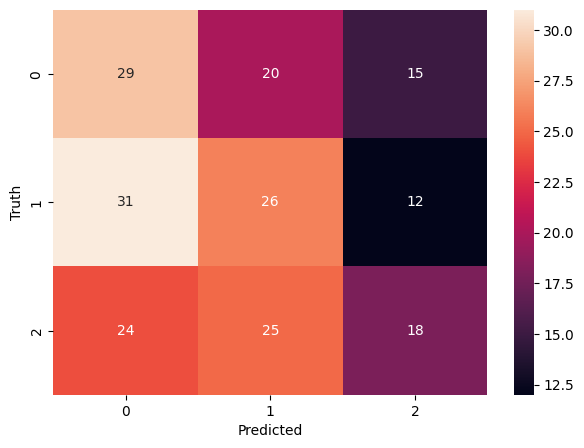

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')